In [50]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats


# Table one bed availability of each facility
## ID  Facility ID
https://health.data.ny.gov/Health/Nursing-Home-Profile/dypu-nabu

In [60]:
all_bed = pd.read_csv('RecentBedCensusOutput.csv')
all_bed.columns

Index(['Facility ID', 'Facility Name', 'Certification Number',
       'Street Address', 'City', 'State', 'Zip', 'County', 'Area Office',
       'Phone', 'Website', 'Census Date', 'Week Difference',
       'Week Difference Category', 'Bed Type', 'Total Capacity',
       'Available Capacity', 'Category', 'Latitude', 'Longitude'],
      dtype='object')

In [65]:
all_bed_count = all_bed.filter(items =['Facility ID','City']).groupby('City').count().sort_values(by ='Facility ID',ascending = False ).reset_index()
all_bed_count

,City,Facility ID
0,Bronx,72
1,Brooklyn,63
2,Rochester,32
3,New York,24
4,Staten Island,18
...,...,...
288,Liverpool,1
289,Livonia,1
290,Lynbrook,1
291,Lyons,1


In [67]:
all_bed['Bed Type'].unique()

array(['NHBEDSAV', 'VENTBEDSAV', 'PEDVENTCAP', 'PEDBEDSAV',
       'ADHCPSLOTSAV', 'BIBEDSAV', 'DIALYSISDEN', 'NEUROBEDSAV',
       'TBIBEDSAV', 'SCATTERBEDSAV'], dtype=object)

In [68]:
all_bed['Facility ID'].nunique()

612

In [69]:
all_bed = all_bed.filter(items = ['Facility ID', 'Facility Name','Census Date','Bed Type', 'Total Capacity',
       'Available Capacity', 'Category','Zip'])
all_bed['Available Capacity'] = all_bed['Available Capacity'].replace('.', 0)
all_bed['Available Capacity']= all_bed['Available Capacity'].astype('int32')
all_bed.head(5)

,Facility ID,Facility Name,Census Date,Bed Type,Total Capacity,Available Capacity,Category,Zip
0,17,St. Peter's Nursing And Rehabilitation Center,05/20/2020,NHBEDSAV,160,40,5,12208
1,19,St. Margaret's Center,05/20/2020,NHBEDSAV,92,3,2,12208
2,19,St. Margaret's Center,05/20/2020,VENTBEDSAV,36,0,0,12208
3,19,St. Margaret's Center,05/20/2020,PEDVENTCAP,36,36,5,12208
4,19,St. Margaret's Center,05/20/2020,PEDBEDSAV,56,3,2,12208


In [70]:
all_bed_agg = all_bed.groupby(["Facility ID","Facility Name","Census Date",'Zip']).sum()
all_bed_agg= all_bed_agg.reset_index()
del all_bed_agg['Category']
all_bed_agg.sort_values(by = 'Available Capacity')

,Facility ID,Facility Name,Census Date,Zip,Total Capacity,Available Capacity
187,664,Sunnyside Care Center,05/20/2020,13057,80,0
207,754,Putnam Nursing & Rehabilitation Center,05/20/2020,12531,160,0
244,908,Woodhaven Nursing Home,05/20/2020,11776,143,0
605,9198,Eddy Village Green at Beverwyck,05/20/2020,12159,24,0
312,1146,Sunshine Children's Home and Rehab Center,05/20/2020,10562,162,0
...,...,...,...,...,...,...
447,1750,Clove Lakes Health Care and Rehabilitation Cen...,05/20/2020,10314,584,246
319,1212,Hebrew Home for the Aged at Riverdale,05/13/2020,10471,851,281
394,1600,Coler Rehabilitation and Nursing Care Center,05/20/2020,10044,815,330
396,1603,"The New Jewish Home, Manhattan",05/20/2020,10025,764,345


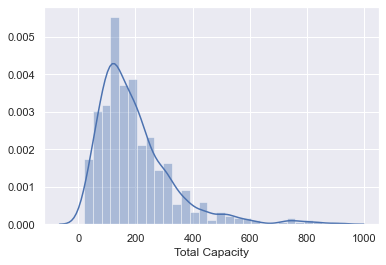

In [71]:
sns.set(color_codes=True)
sns.distplot(all_bed_agg['Total Capacity'])


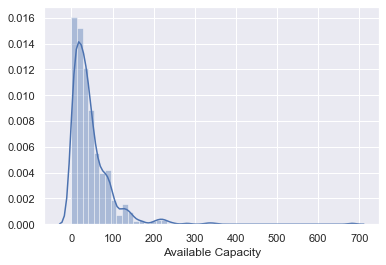

In [72]:
sns.distplot(all_bed_agg['Available Capacity'])

# Table 2 Nursing Home Quality

## ID Facility ID Link with table 1 with facility ID
https://health.data.ny.gov/Health/Nursing-Home-Quality-Initiative-Beginning-2012/aruj-fgbm

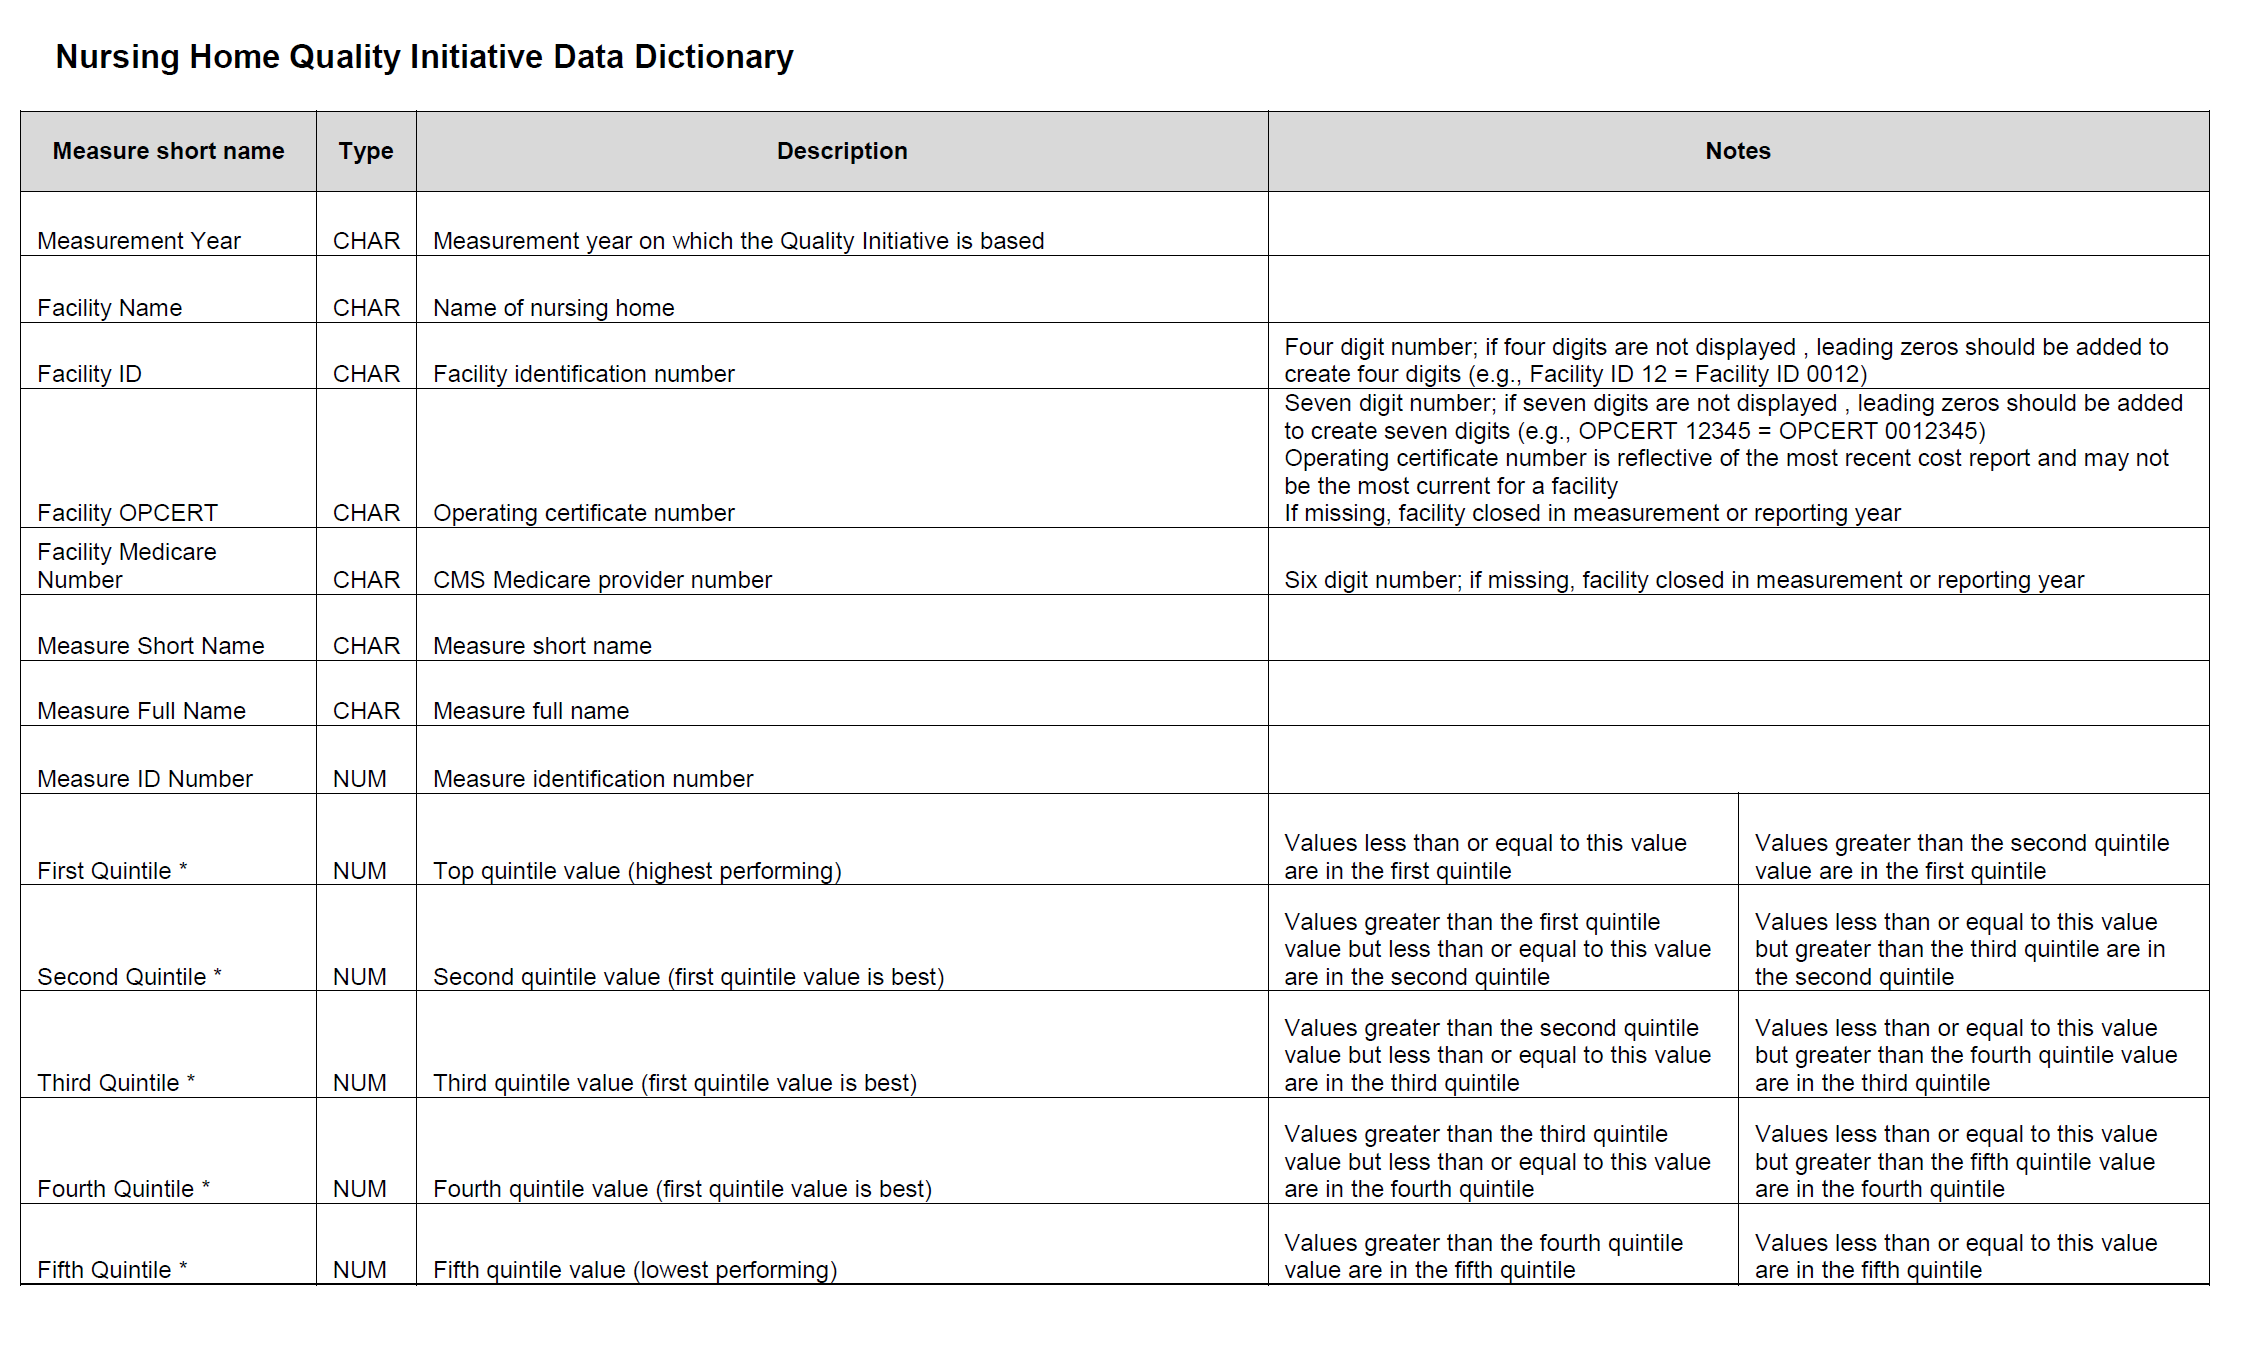

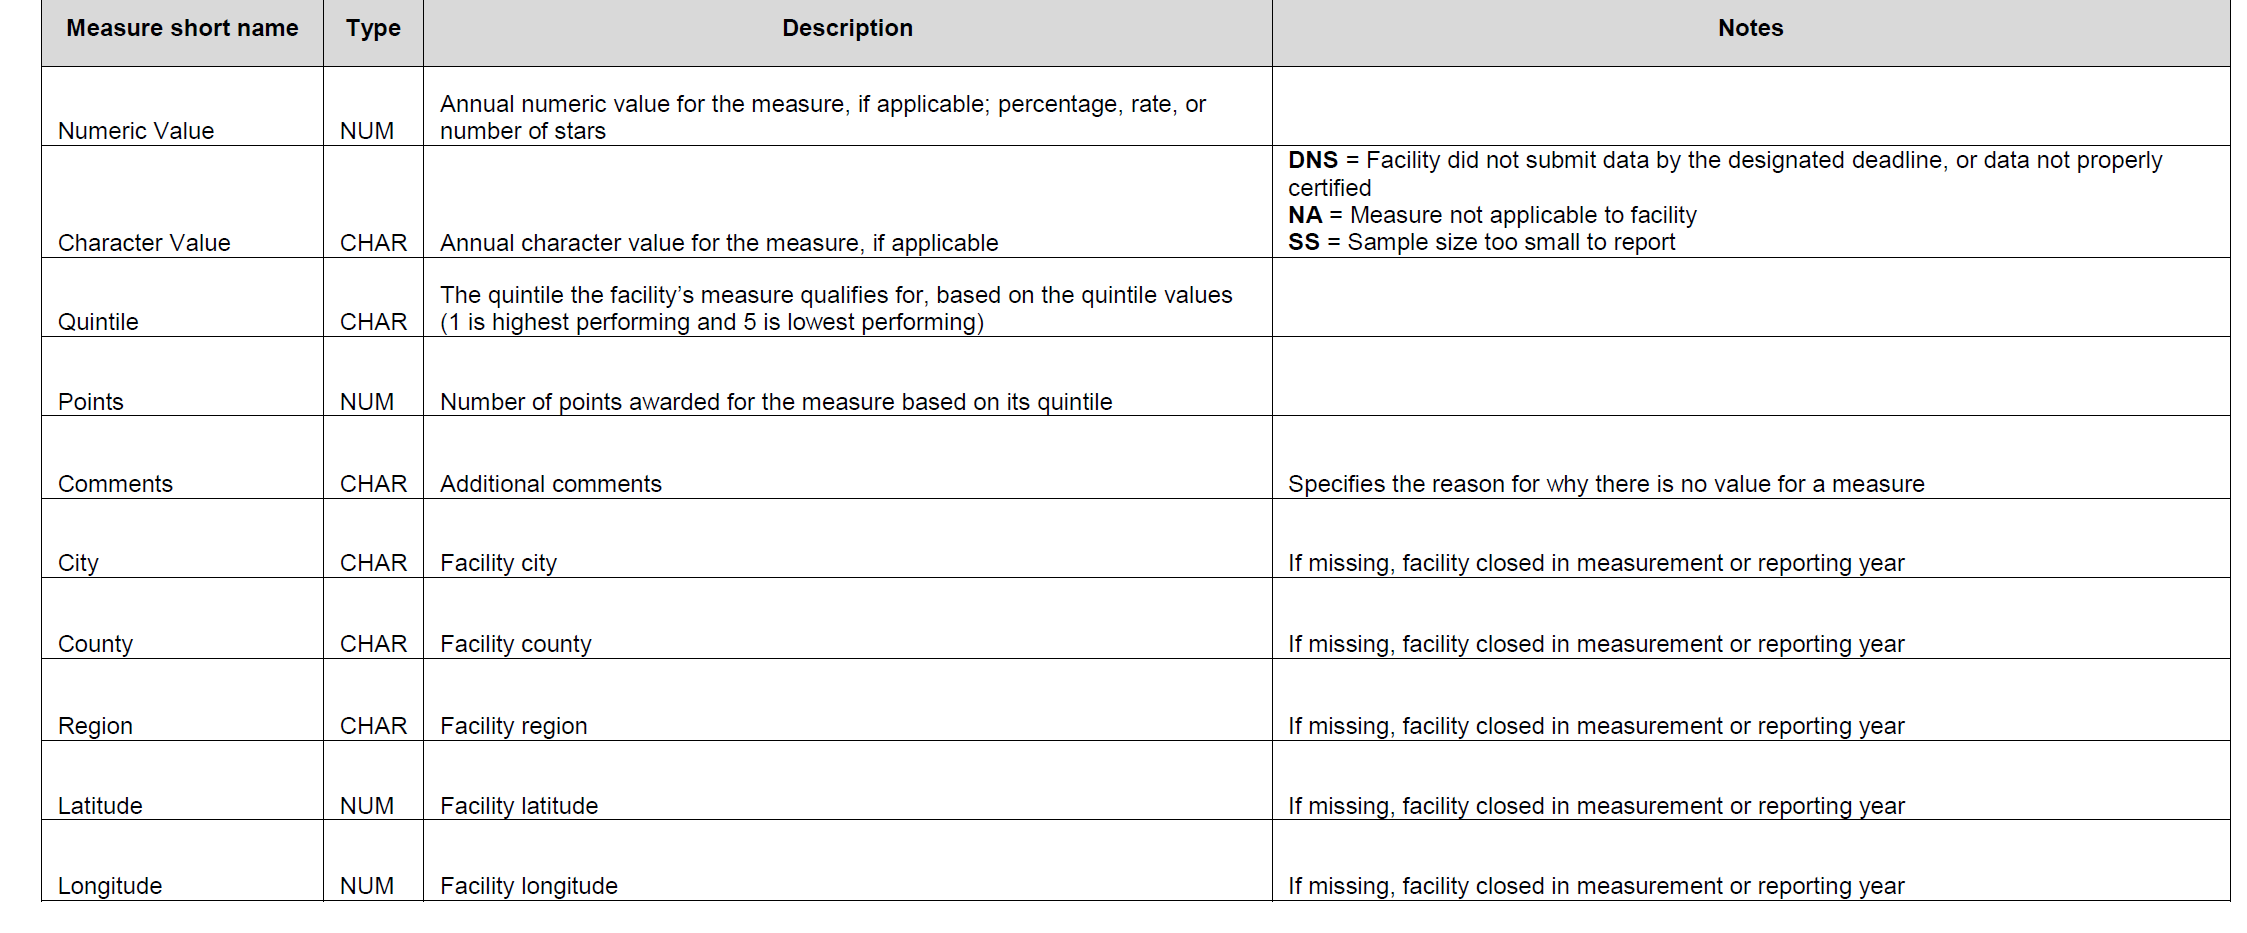

Facility ID can link table with bed capacity and service quality

In [97]:
quality2 = pd.read_csv('Nursing_Home_Quality_Initiative__Beginning_2012.csv')
print(quality2.columns)
##if Facility Medicare Number is missing, meaning that it is closed in that year
quality2.dropna(subset=['Facility OPCERT'])
quality2 =quality2.filter(items = ['Measurement Year', 'Facility Name', 'Facility ID', 'Facility OPCERT',
       'Facility Medicare Number', 'Measure Short Name', 'Measure Full Name',
       'Measure ID Number', 'First Quintile', 'Second Quintile',
       'Third Quintile', 'Fourth Quintile', 'Fifth Quintile', 'Numeric Value',
       'Character Value', 'Quintile', 'Points', 'Comments'])
quality2 =quality2[quality2['Facility OPCERT']!='.']
quality2['Facility OPCERT']= quality2['Facility OPCERT'].astype('int64')
quality2.head(5)

Index(['Measurement Year', 'Facility Name', 'Facility ID', 'Facility OPCERT',
       'Facility Medicare Number', 'Measure Short Name', 'Measure Full Name',
       'Measure ID Number', 'First Quintile', 'Second Quintile',
       'Third Quintile', 'Fourth Quintile', 'Fifth Quintile', 'Numeric Value',
       'Character Value', 'Quintile', 'Points', 'Comments', 'City', 'County',
       'Region', 'Current Facility Name', 'Location'],
      dtype='object')


,Measurement Year,Facility Name,Facility ID,Facility OPCERT,Facility Medicare Number,Measure Short Name,Measure Full Name,Measure ID Number,First Quintile,Second Quintile,Third Quintile,Fourth Quintile,Fifth Quintile,Numeric Value,Character Value,Quintile,Points,Comments
0,2015,Good Shepherd-Fairview Home Inc,49,301305,335527,FACILITY CLOSURE,Facility closed during the measurement or repo...,22.0,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN
1,2015,"Heritage Village Rehab and Skilled Nursing, Inc.",112,662301,335353,RATE OF STAFF HOURS PER DAY,Rate of staff hours per day,2.2,12.5,3.1,2.8,2.5,2.3,3.0,NaN,2.0,3.00,NaN
2,2015,NYS Veterans Home,133,825301,335097,FACILITY CLOSURE,Facility closed during the measurement or repo...,22.0,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN
3,2014,Clinton County Nursing Home,144,952300,335598,FACILITY EMPLOYEE FLU VACCINE,Percent of employees vaccinated for the flu,3.0,NaN,NaN,NaN,NaN,NaN,97.0,NaN,NaN,5.00,NaN
4,2012,Barnwell Nursing & Rehabilitation Center,154,1023301,335565,FACILITY CONTRACT STAFF,Annual level of temporary contract/agency staf...,1.0,NaN,NaN,NaN,NaN,NaN,2.7,NaN,NaN,4.29,NaN


Here is the measurement of service quality of each facility

In [13]:
quality2['Measure Full Name'].unique()

array(['Facility closed during the measurement or reporting year',
       'Rate of staff hours per day',
       'Percent of employees vaccinated for the flu',
       'Annual level of temporary contract/agency staff used',
       'Timely submission of employee influenza immunization data',
       'CMS five-star quality rating for health inspections',
       'Quintile rank',
       'J/K/L deficiency during the measurement or payment year',
       'Percent of long stay residents with a urinary tract infection',
       'Percent of long stay residents who lose too much weight',
       'Percent of long stay residents who have depressive symptoms',
       'CMS five-star quality rating for staffing',
       'Percent of long stay residents who received the pneumococcal vaccine',
       'Facility closed between January 2012 and November 2013',
       'Overall score', 'Percent of contract/agency staff used',
       'Number of potentially avoidable hospitalizations per 10,000 long stay days',
    

In [84]:
quality_plot= quality2[(quality2['Measure Full Name']=='Percent of long stay residents who received the seasonal influenza vaccine')\
         & (quality2['Measurement Year']==2017)]

In [85]:
quality_plot.filter(items = ['Facility Name','Facility ID', 'Facility OPCERT','Measure Full Name','First Quintile', 'Second Quintile',
       'Third Quintile', 'Fourth Quintile', 'Fifth Quintile', 'Numeric Value','Quintile', 'Points']).sort_values(by = 'Numeric Value')

,Facility Name,Facility ID,Facility OPCERT,Measure Full Name,First Quintile,Second Quintile,Third Quintile,Fourth Quintile,Fifth Quintile,Numeric Value,Quintile,Points
74292,Brooklyn Gardens Nursing & Rehabilitation Center,7069,7001800,Percent of long stay residents who received th...,100.0,92.0,87.0,82.0,76.0,46.0,5.0,0.0
71465,The Grand Rehabilitation and Nursing at River ...,6232,1302309,Percent of long stay residents who received th...,100.0,92.0,87.0,82.0,76.0,49.0,5.0,0.0
51909,Sea Crest Nursing and Rehabilitation Center,1401,7001806,Percent of long stay residents who received th...,100.0,92.0,87.0,82.0,76.0,52.0,5.0,0.0
6041,Comprehensive Rehabilitation and Nursing Cente...,274,1421308,Percent of long stay residents who received th...,100.0,92.0,87.0,82.0,76.0,53.0,5.0,0.0
54060,Williamsville Suburban LLC,1378,1421306,Percent of long stay residents who received th...,100.0,92.0,87.0,82.0,76.0,53.0,5.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
72756,James G. Johnston Memorial Nursing Home,3242,303306,Percent of long stay residents who received th...,100.0,92.0,87.0,82.0,76.0,98.0,1.0,5.0
43105,Jeanne Jugan Residence,1222,7000313,Percent of long stay residents who received th...,100.0,92.0,87.0,82.0,76.0,99.0,1.0,5.0
10689,Wedgewood Nursing and Rehabilitation Center,457,2722302,Percent of long stay residents who received th...,100.0,92.0,87.0,82.0,76.0,100.0,1.0,5.0
387,Maplewood Nursing Home Inc,462,2729300,Percent of long stay residents who received th...,100.0,92.0,87.0,82.0,76.0,100.0,1.0,5.0


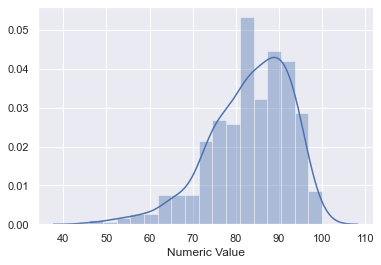

In [33]:
sns.distplot(quality_plot['Numeric Value'])

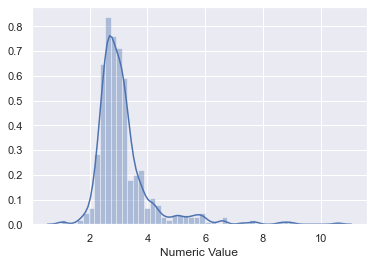

In [34]:
quality_plot= quality2[(quality2['Measure Full Name']=='Rate of staff hours per day')\
         & (quality2['Measurement Year']==2017)]
quality_plot.filter(items = ['Facility Name','Facility ID', 'Facility OPCERT','Measure Full Name','First Quintile', 'Second Quintile',
       'Third Quintile', 'Fourth Quintile', 'Fifth Quintile', 'Numeric Value','Quintile', 'Points']).sort_values(by = 'Numeric Value')
sns.distplot(quality_plot['Numeric Value'])

# Facility OPCERT can be used to link to cost table

# Table 3 facility information 
## id Facility ID link with table 1 and 2 with facility ID
https://health.data.ny.gov/Health/Health-Facility-Certification-Information/2g9y-7kqm

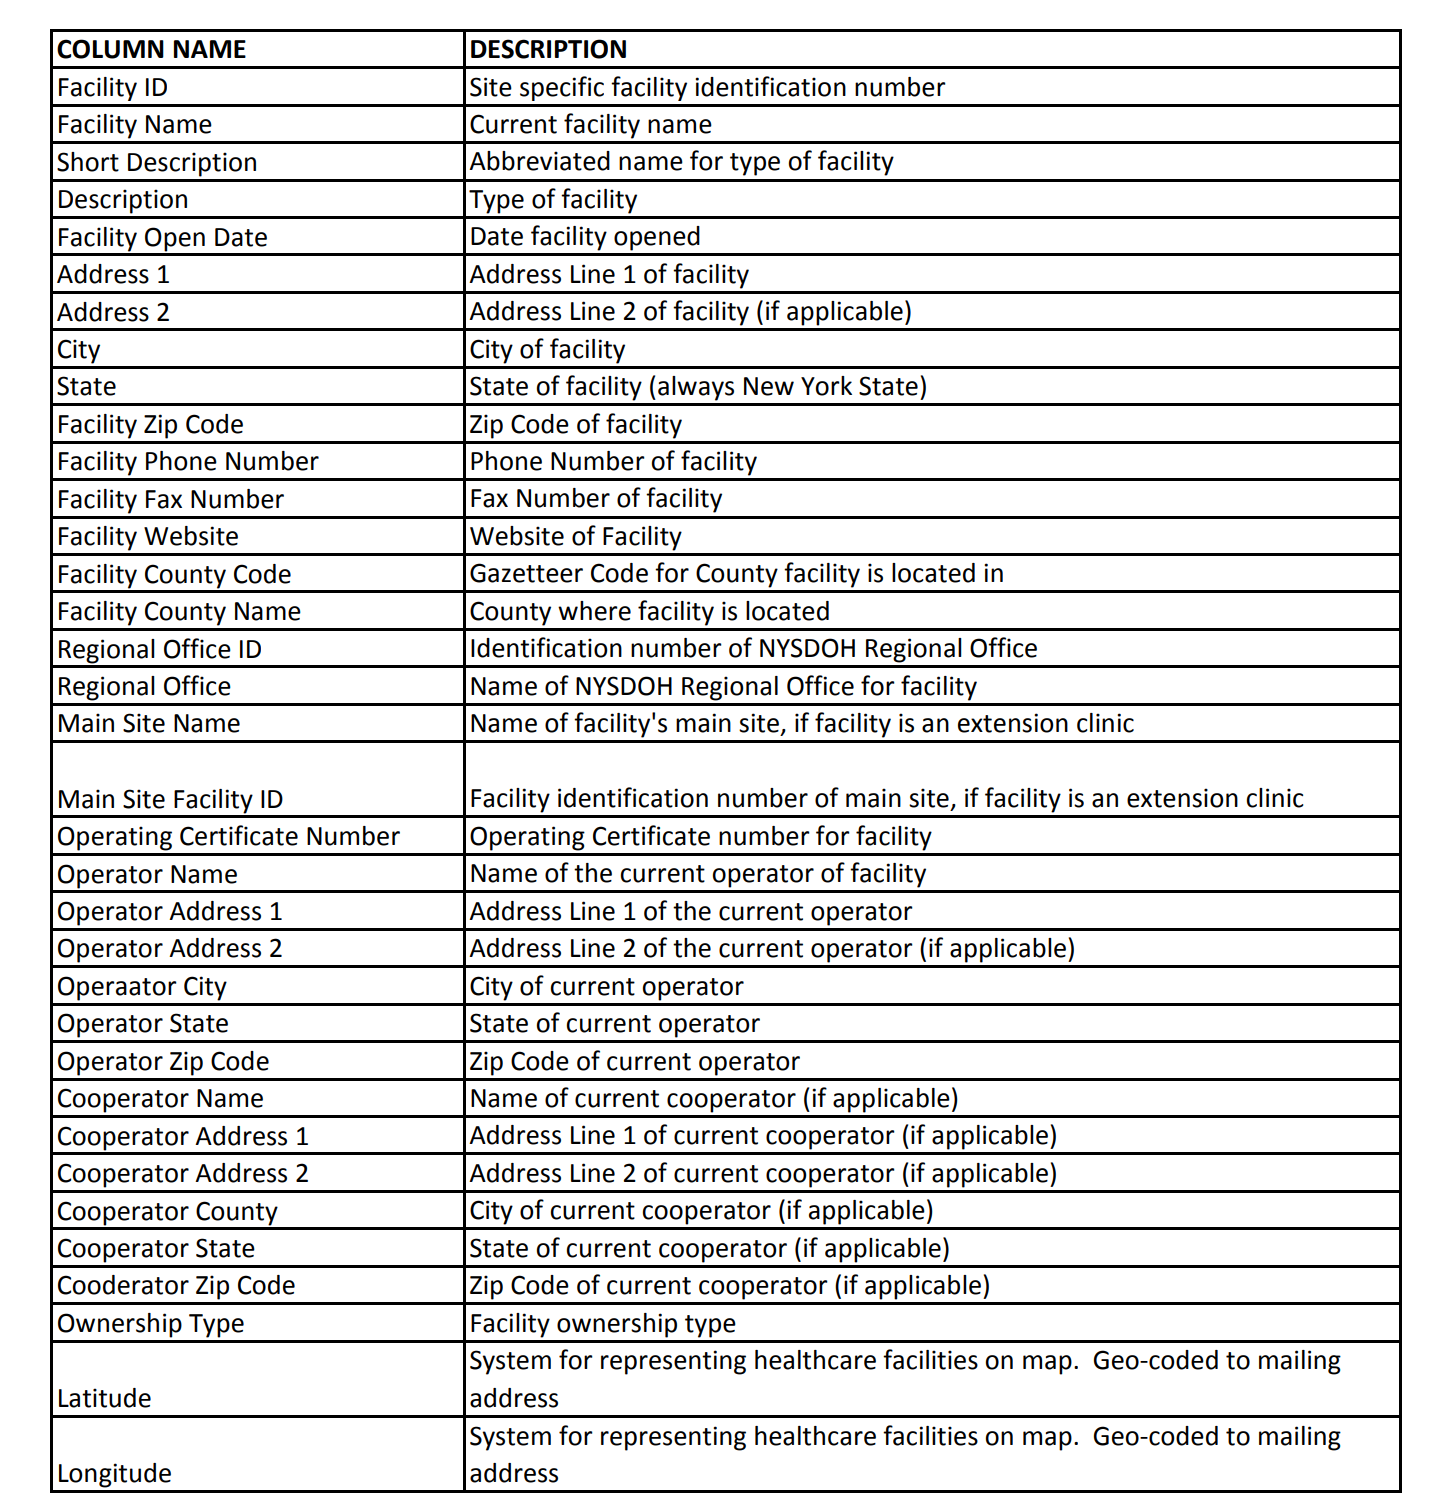

In [28]:
Facility_General_Information = pd.read_csv('Health_Facility_General_Information.csv')
print(Facility_General_Information.columns)
Facility_General_Information.head(5)

Index(['Facility ID', 'Facility Name', 'Short Description', 'Description',
       'Facility Open Date', 'Facility Address 1', 'Facility Address 2',
       'Facility City', 'Facility State', 'Facility Zip Code',
       'Facility Phone Number', 'Facility Fax Number', 'Facility Website',
       'Facility County Code', 'Facility County', 'Regional Office ID',
       'Regional Office', 'Main Site Name', 'Main Site Facility ID',
       'Operating Certificate Number', 'Operator Name', 'Operator Address 1',
       'Operator Address 2', 'Operator City', 'Operator State',
       'Operator Zip Code', 'Cooperator Name', 'Cooperator Address',
       'Cooperator Address 2', 'Cooperator City', 'Cooperator State',
       'Cooperator Zip Code', 'Ownership Type', 'Facility Latitude',
       'Facility Longitude', 'Facility Location'],
      dtype='object')


,Facility ID,Facility Name,Short Description,Description,Facility Open Date,Facility Address 1,Facility Address 2,Facility City,Facility State,Facility Zip Code,...,Cooperator Name,Cooperator Address,Cooperator Address 2,Cooperator City,Cooperator State,Cooperator Zip Code,Ownership Type,Facility Latitude,Facility Longitude,Facility Location
0,204,Hospice at Lourdes,HSPC,Hospice,06/01/1985,4102 Old Vestal Road,NaN,Vestal,New York,13850,...,NaN,NaN,NaN,NaN,New York,NaN,Not for Profit Corporation,42.097095,-75.975243,"(42.097095, -75.975243)"
1,620,Charles T Sitrin Health Care Center Inc,NH,Residential Health Care Facility - SNF,02/01/1989,2050 Tilden Avenue,NaN,New Hartford,New York,13413,...,NaN,NaN,NaN,NaN,New York,NaN,Not for Profit Corporation,43.054970,-75.228828,"(43.05497, -75.228828)"
2,654,Central Park Rehabilitation and Nursing Center,NH,Residential Health Care Facility - SNF,02/01/1989,116 Martin Luther King East,NaN,Syracuse,New York,13205,...,NaN,NaN,NaN,NaN,New York,NaN,LLC,NaN,NaN,NaN
3,1156,East Side Nursing Home,NH,Residential Health Care Facility - SNF,08/01/1979,62 Prospect St,NaN,Warsaw,New York,14569,...,NaN,NaN,NaN,NaN,New York,NaN,Business Corporation,42.738979,-78.128670,"(42.738979, -78.12867)"
4,2589,Wellsville Manor Care Center,NH,Residential Health Care Facility - SNF,02/01/1989,4192A Bolivar Road,NaN,Wellsville,New York,14895,...,NaN,NaN,NaN,NaN,New York,NaN,LLC,42.126461,-77.967834,"(42.126461, -77.967834)"


In [30]:
Facility_General_Information['Facility ID'].nunique()

3835

# Table 4 Nursing Home cost with a large mapping dict

including very detailed information about the financial situation of each nursing home facility

## ID Opcert can map with table two with Facility OPCERT
https://health.data.ny.gov/Health/Nursing-Home-Cost-Report-RHCF-2018/yqxb-eiym

In [73]:
cost1 = pd.read_csv('NYSDOH_NHCostReport_2018\\numeric1.csv')
cost2 = pd.read_csv('NYSDOH_NHCostReport_2018\\numeric2.csv')
cost_dict = pd.read_csv('NYSDOH_NHCostReport_2018\\NHCRdata_dictionary.csv')
cost_dict_origin = pd.read_csv('NYSDOH_NHCostReport_2018\\NHCRdata_dictionary_origin.csv')
# cost_dict_origin =pd.read_excel('NYSDOH_NHCostReport_2018\\NHCRdata_dictionary.xlsx')

C:\Users\18582\AppData\Local\Continuum\anaconda3\envs\pytorch\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [74]:
cost = pd.concat([cost1,cost2])

In [75]:
cost= cost.rename(columns= {'Class code':'class_code','Line number':'line_no'}).merge(cost_dict_origin,how ='left')
cost.head(5)
del cost['text_numeric']

In [81]:
cost_example = cost[(cost['Opcert']==2950302)&(cost['Year']==2018)]
cost_example

,Opcert,Year,class_code,line_no,Value,description
0,2950302,2018,99,1,6.0,Pre-fatory - RHCF Ownership Type ;Code ;Owne...
1,2950302,2018,100,1,1.0,Pre-fatory - 1) Ownership Information Operatio...
2,2950302,2018,100,99,1.0,Pre-fatory - 1) Ownership Information Operatio...
3,2950302,2018,101,1,100.0,Pre-fatory - 1) Ownership Information Operatio...
4,2950302,2018,101,99,100.0,Pre-fatory - 1) Ownership Information Operatio...
...,...,...,...,...,...,...
1122,2950302,2018,1405,98,14674.0,2009 COST REPORT CCLNS
1123,2950302,2018,1405,110,2527931.0,2009 COST REPORT CCLNS
1124,2950302,2018,9400,1,1.0,(fl) CCLN 9400/1
1125,2950302,2018,9400,2,1.0,(fl) CCLN 9400/2


In [112]:
cost_example[cost_example['description']=='Part I - 6) Age  ;Male   RHCF  ;Age:  21-54  ;']

,Opcert,Year,class_code,line_no,Value,description
90,2950302,2018,412,3,22.0,Part I - 6) Age ;Male RHCF ;Age: 21-54 ;


In [108]:
quality2[quality2['Facility OPCERT']==2950302].head(1)

,Measurement Year,Facility Name,Facility ID,Facility OPCERT,Facility Medicare Number,Measure Short Name,Measure Full Name,Measure ID Number,First Quintile,Second Quintile,Third Quintile,Fourth Quintile,Fifth Quintile,Numeric Value,Character Value,Quintile,Points,Comments
16136,2013,A Holly Patterson Extended Care Facility,534,2950302,335023,FACILITY QUINTILE RANK,Quintile rank,20.0,81.1,61.0,53.0,46.0,40.0,1.0,NaN,NaN,NaN,NaN


In [110]:
cost_example['description'].unique()

array(['Pre-fatory - RHCF Ownership Type  ;Code  ;Ownership Type  ;',
       'Pre-fatory - 1) Ownership Information Operations  ;Number (2)  ;  ;',
       'Pre-fatory - 1) Ownership Information Operations  ;Percent Ownership (3)  ;  ;',
       'Pre-fatory - 2) Corporate Stockholders / Board of Directors  ;Number (1)  ;  ;',
       'Pre-fatory - 2) Corporate Stockholders / Board of Directors  ;% of Owner. (2)  ;  ;',
       'Pre-fatory - 3) Ownership Information Tangible Property  ;Land Percent Ownership  ;  ;',
       'Pre-fatory - 3) Ownership Information Tangible Property  ;Building Percent Ownership  ;  ;',
       'Pre-fatory - 3) Ownership Information Tangible Property  ;Moveable Equipment Percent Ownership  ;  ;',
       'Schedule 14 Supplementary Salary and Fringe Benefits   ;     Paid (1) Or Imputed (2)  ;  ;',
       'Schedule 14 Supplementary Salary and Fringe Benefits   ;     Salary  ;  ;',
       'Schedule 14 Supplementary Salary and Fringe Benefits   ;     Salary  ;Totals (

# Table 5 Vaccination rate of employee 

## id 'Facility ID'  can map with 1 2 3 4 
https://health.data.ny.gov/Health/Influenza-Vaccination-Rates-for-Health-Care-Person/jpkp-z76p

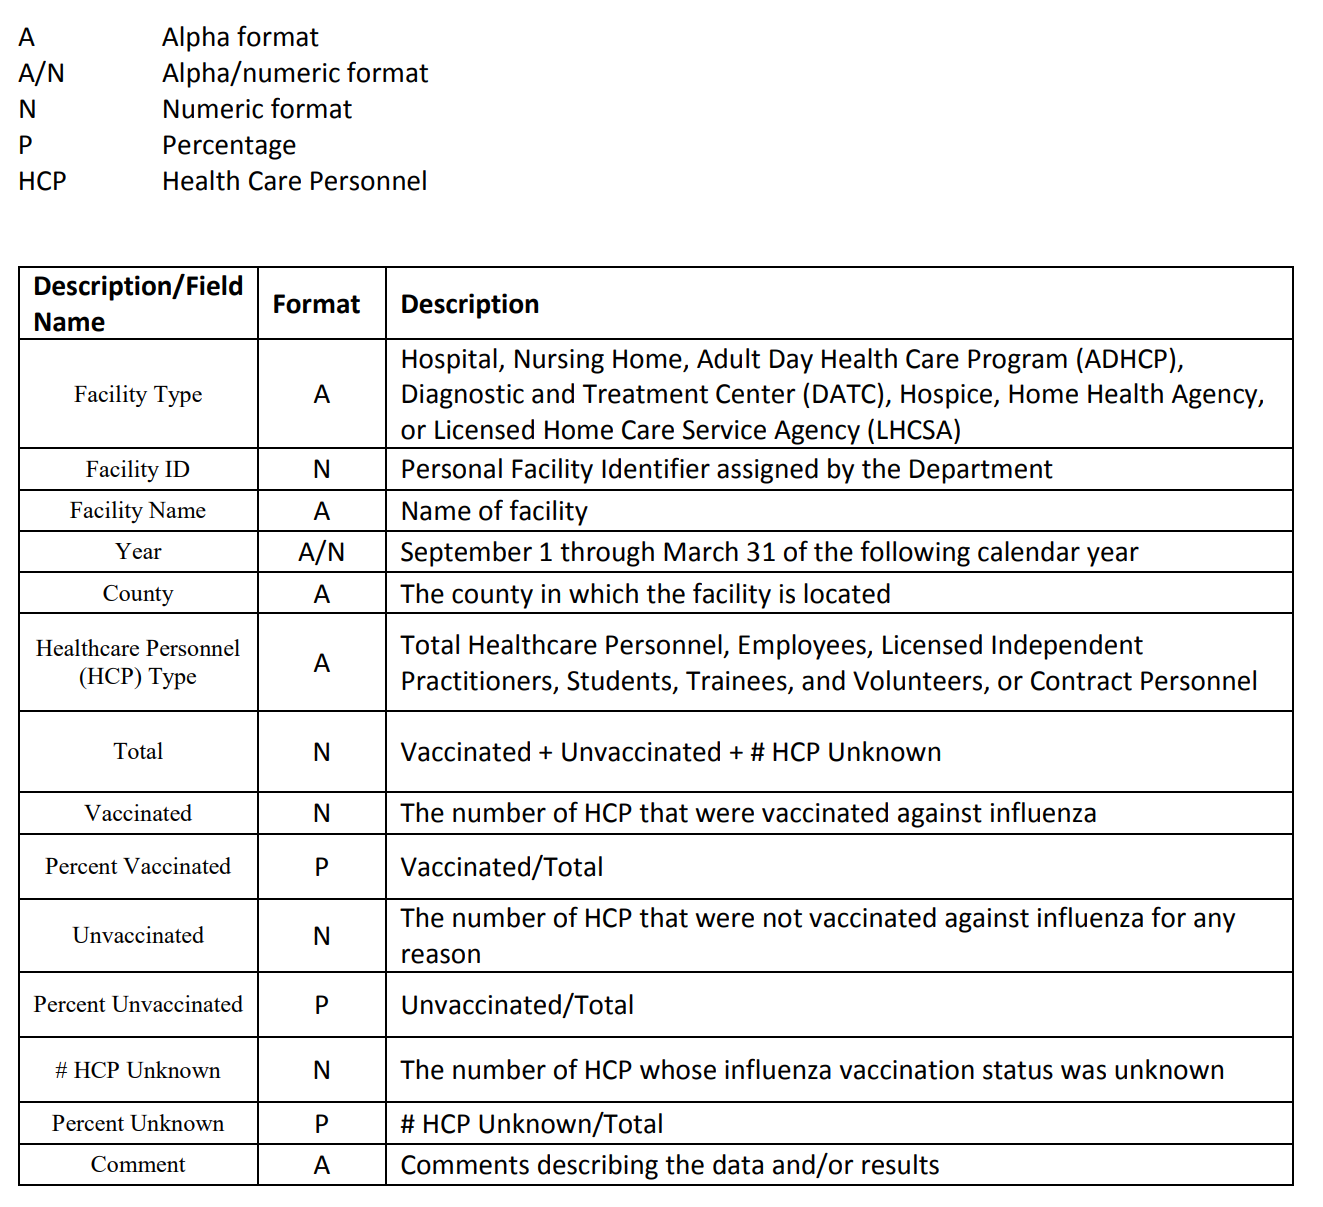

In [113]:
Vaccination= pd.read_csv('Influenza_Vaccination_Rates_for_Health_Care_Personnel__Beginning_2012-13.csv')
Vaccination = Vaccination[Vaccination['Facility Type'] =='Nursing Home']
Vaccination.columns

Index(['Facility Type', 'Facility ID', 'Facility Name', 'Year', 'County',
       'Healthcare Personnel (HCP) Type', 'Total', 'Vaccinated',
       'Percent Vaccinated', 'Unvaccinated', 'Percent Unvaccinated',
       '# HCP Unknown', 'Unknown', 'Comment'],
      dtype='object')

In [120]:
vac_plot = Vaccination[(Vaccination.Year == '2017-2018')&(Vaccination.Total != '0')]
vac_plot.head(5)

,Facility Type,Facility ID,Facility Name,Year,County,Healthcare Personnel (HCP) Type,Total,Vaccinated,Percent Vaccinated,Unvaccinated,Percent Unvaccinated,# HCP Unknown,Unknown,Comment
14479,Nursing Home,1381,"Cobble Hill Health Center, Inc",2017-2018,Kings,Employees,431,352,81.67,79,18.33,0,0.00,NaN
18444,Nursing Home,1242,Regeis Care Center,2017-2018,Bronx,Employees,312,194,62.18,100,32.05,18,5.77,NaN
20428,Nursing Home,0664,Sunnyside Care Center,2017-2018,Onondaga,Employees,136,122,89.71,6,4.41,8,5.88,NaN
47369,Nursing Home,0534,A Holly Patterson Extended Care Facility,2017-2018,Nassau,Total Healthcare Personnel,751,636,84.69,115,15.31,0,0.00,NaN
47370,Nursing Home,0534,A Holly Patterson Extended Care Facility,2017-2018,Nassau,"Students, Trainees and Volunteers",164,NaN,95.00,NaN,NaN,NaN,NaN,HCP influenza vaccination rate isgreater than ...


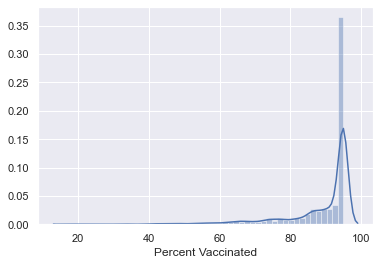

In [122]:
sns.distplot(vac_plot['Percent Vaccinated'])

# Table 6 Staff training information

# using Facility Name to do mapping so some of the mapping need to adjust later

## after merging , using Facility ID to merge back table 12345
https://nursinghome411.org/nursing-home-staffing-2019-q4/

In [123]:
staff = pd.read_csv('NY-Staffing-2019-Q4.csv')
Facility_General_Information = pd.read_csv('Health_Facility_General_Information.csv')
print(Facility_General_Information.columns)
Facility_General_Information = Facility_General_Information.filter(items =['Facility ID','Facility Name','Facility City','Facility County'])
Facility_General_Information['Facility Name'] =Facility_General_Information['Facility Name'].str.lower()
Facility_General_Information['Facility City'] =Facility_General_Information['Facility City'].str.lower()
staff['Provider Name'] = staff['Provider Name'].str.lower()
staff['City'] = staff['City'].str.lower()
Facility_General_Information

Index(['Facility ID', 'Facility Name', 'Short Description', 'Description',
       'Facility Open Date', 'Facility Address 1', 'Facility Address 2',
       'Facility City', 'Facility State', 'Facility Zip Code',
       'Facility Phone Number', 'Facility Fax Number', 'Facility Website',
       'Facility County Code', 'Facility County', 'Regional Office ID',
       'Regional Office', 'Main Site Name', 'Main Site Facility ID',
       'Operating Certificate Number', 'Operator Name', 'Operator Address 1',
       'Operator Address 2', 'Operator City', 'Operator State',
       'Operator Zip Code', 'Cooperator Name', 'Cooperator Address',
       'Cooperator Address 2', 'Cooperator City', 'Cooperator State',
       'Cooperator Zip Code', 'Ownership Type', 'Facility Latitude',
       'Facility Longitude', 'Facility Location'],
      dtype='object')


,Facility ID,Facility Name,Facility City,Facility County
0,204,hospice at lourdes,vestal,Broome
1,620,charles t sitrin health care center inc,new hartford,Oneida
2,654,central park rehabilitation and nursing center,syracuse,Onondaga
3,1156,east side nursing home,warsaw,Wyoming
4,2589,wellsville manor care center,wellsville,Allegany
...,...,...,...,...
3989,4615,ps 94 health extension clinic,brooklyn,Kings
3990,6236,canandaigua family practice,canandaigua,Ontario
3991,10071,ms145,bronx,Bronx
3992,2842,cohocton center,cohocton,Steuben


In [124]:
staff

,State,Provider Name,City,County,MDS Census,RN Hours,LPN Hours,CNA Hours,Total Care Staffing Hours,Avg Total Staffing HPRD,Avg RN Staffing HPRD
0,NY,a holly patterson extended care facility,uniondale,Nassau,460.6,138.6,134.6,484.8,758.0,1.6,0.3
1,NY,aaron manor rehabilitation and nursing center,fairport,Monroe,131.0,32.7,104.7,263.3,400.7,3.1,0.2
2,NY,absolut ctr for nursing & rehab allegany l l c,allegany,Cattaraugus,36.7,19.7,26.2,60.6,106.5,2.9,0.5
3,NY,absolut ctr for nursing & rehab aurora park l l c,east aurora,Erie,310.2,86.0,287.4,603.7,977.2,3.2,0.3
4,NY,absolut ctr for nursing & rehab endicott l l c,endicott,Broome,152.2,39.7,145.0,318.8,503.5,3.3,0.3
...,...,...,...,...,...,...,...,...,...,...,...
599,NY,woodside manor nursing home inc,rochester,Monroe,38.2,10.6,36.1,82.8,129.4,3.4,0.3
600,NY,workmens circle multicare center,bronx,Bronx,508.9,352.9,83.0,1089.7,1525.6,3.0,0.7
601,NY,wyoming county community hospital s n f,warsaw,Wyoming,137.8,48.4,154.4,331.2,534.0,3.9,0.4
602,NY,yonkers gardens center for nursing and rehab,yonkers,Westchester,149.7,42.3,91.5,287.9,421.7,2.8,0.3


In [125]:
staff_merge = staff.merge(Facility_General_Information,how = 'left',left_on = ['City','Provider Name'],right_on = ['Facility City','Facility Name'])
staff_merge

,State,Provider Name,City,County,MDS Census,RN Hours,LPN Hours,CNA Hours,Total Care Staffing Hours,Avg Total Staffing HPRD,Avg RN Staffing HPRD,Facility ID,Facility Name,Facility City,Facility County
0,NY,a holly patterson extended care facility,uniondale,Nassau,460.6,138.6,134.6,484.8,758.0,1.6,0.3,534.0,a holly patterson extended care facility,uniondale,Nassau
1,NY,aaron manor rehabilitation and nursing center,fairport,Monroe,131.0,32.7,104.7,263.3,400.7,3.1,0.2,431.0,aaron manor rehabilitation and nursing center,fairport,Monroe
2,NY,absolut ctr for nursing & rehab allegany l l c,allegany,Cattaraugus,36.7,19.7,26.2,60.6,106.5,2.9,0.5,NaN,NaN,NaN,NaN
3,NY,absolut ctr for nursing & rehab aurora park l l c,east aurora,Erie,310.2,86.0,287.4,603.7,977.2,3.2,0.3,NaN,NaN,NaN,NaN
4,NY,absolut ctr for nursing & rehab endicott l l c,endicott,Broome,152.2,39.7,145.0,318.8,503.5,3.3,0.3,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
611,NY,woodside manor nursing home inc,rochester,Monroe,38.2,10.6,36.1,82.8,129.4,3.4,0.3,466.0,woodside manor nursing home inc,rochester,Monroe
612,NY,workmens circle multicare center,bronx,Bronx,508.9,352.9,83.0,1089.7,1525.6,3.0,0.7,NaN,NaN,NaN,NaN
613,NY,wyoming county community hospital s n f,warsaw,Wyoming,137.8,48.4,154.4,331.2,534.0,3.9,0.4,NaN,NaN,NaN,NaN
614,NY,yonkers gardens center for nursing and rehab,yonkers,Westchester,149.7,42.3,91.5,287.9,421.7,2.8,0.3,NaN,NaN,NaN,NaN


In [127]:
staff_merge[staff_merge['Facility Name'].isna()]

,State,Provider Name,City,County,MDS Census,RN Hours,LPN Hours,CNA Hours,Total Care Staffing Hours,Avg Total Staffing HPRD,Avg RN Staffing HPRD,Facility ID,Facility Name,Facility City,Facility County
2,NY,absolut ctr for nursing & rehab allegany l l c,allegany,Cattaraugus,36.7,19.7,26.2,60.6,106.5,2.9,0.5,NaN,NaN,NaN,NaN
3,NY,absolut ctr for nursing & rehab aurora park l l c,east aurora,Erie,310.2,86.0,287.4,603.7,977.2,3.2,0.3,NaN,NaN,NaN,NaN
4,NY,absolut ctr for nursing & rehab endicott l l c,endicott,Broome,152.2,39.7,145.0,318.8,503.5,3.3,0.3,NaN,NaN,NaN,NaN
5,NY,absolut ctr for nursing & rehab gasport l l c,gasport,Niagara,78.9,19.5,81.1,135.1,235.7,3.0,0.2,NaN,NaN,NaN,NaN
6,NY,absolut ctr for nursing & rehab three rivers l...,painted post,Steuben,113.3,37.4,85.2,183.4,306.0,2.7,0.3,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,NY,"woodcrest rehab & residential h c center, l l c",flushing,Queens,196.0,94.5,100.4,409.4,604.3,3.1,0.5,NaN,NaN,NaN,NaN
609,NY,woodhaven nursing home,port jefferson stati,Suffolk,124.2,14.1,148.6,241.6,404.4,3.3,0.1,NaN,NaN,NaN,NaN
612,NY,workmens circle multicare center,bronx,Bronx,508.9,352.9,83.0,1089.7,1525.6,3.0,0.7,NaN,NaN,NaN,NaN
613,NY,wyoming county community hospital s n f,warsaw,Wyoming,137.8,48.4,154.4,331.2,534.0,3.9,0.4,NaN,NaN,NaN,NaN


# 7 NY_Infection and Citations

## ID Provider Name merge with staff and merge back to facility ID
https://nursinghome411.org/nursing-home-infection-control-citations-march2020/

In [125]:
citations = pd.read_csv('NY_InfectionCitations_2017-2019.csv')
citations

,Provider State,Provider Name,Provider Address,Provider City,Provider Zip Code,Survey Date,Deficiency Tag Number,Scope Severity Code
0,NY,ABSOLUT CTR FOR NURSING & REHAB ENDICOTT L L C,301 NANTUCKET DRIVE,ENDICOTT,13760,12/3/2018 0:00,880,D
1,NY,ABSOLUT CTR FOR NURSING & REHAB ENDICOTT L L C,301 NANTUCKET DRIVE,ENDICOTT,13760,4/8/2016 0:00,441,E
2,NY,ABSOLUT CTR FOR NURSING & REHAB ORCHARD PARK L...,6060 ARMOR ROAD,ORCHARD PARK,14127,2/13/2019 0:00,880,D
3,NY,ABSOLUT CTR FOR NURSING & REHAB ORCHARD PARK L...,6060 ARMOR ROAD,ORCHARD PARK,14127,10/18/2017 0:00,441,E
4,NY,ABSOLUT CTR FOR NURSING & REHAB ORCHARD PARK L...,6060 ARMOR ROAD,ORCHARD PARK,14127,9/29/2016 0:00,441,D
...,...,...,...,...,...,...,...,...
538,NY,WOODHAVEN NURSING HOME,1360 ROUTE 112,PORT JEFFERSON STATI,11776,7/17/2018 0:00,880,D
539,NY,WOODLAND POND AT NEW PALTZ,100 WOODLAND POND CIRCLE,NEW PALTZ,12561,4/25/2018 0:00,880,F
540,NY,WYOMING COUNTY COMMUNITY HOSPITAL S N F,400 NORTH MAIN STREET,WARSAW,14569,2/12/2019 0:00,880,D
541,NY,WYOMING COUNTY COMMUNITY HOSPITAL S N F,400 NORTH MAIN STREET,WARSAW,14569,9/29/2017 0:00,441,D


# 8 Drug usage including Nursing Home Antipsychotic Drugging Rates

## ID Provider Name merge with staff and merge back to facility ID
https://nursinghome411.org/us-nursing-home-antipsychotic-drugging-rates-2018q3/

In [126]:
drug_usage = pd.read_csv('NY-AP-Drugging-Rates-2018-Q3.csv')
drug_usage

,Facility Name,County,ZIP Code,Percent Receiving Antipsychotic Drugs,Percent Not Receiving Antipsychotic Drugs
0,THE EMERALD PEEK REHABILITATION AND NURSING CE...,Westchester,10566,26.14%,73.86%
1,AUBURN REHABILITATION & NURSING CENTER,Cayuga,13021,16.88%,83.12%
2,BRIARCLIFF MANOR CENTER FOR REHAB AND NURSING ...,Westchester,10510,24.30%,75.70%
3,KATHERINE LUTHER RESIDENTIAL HLTH CARE & REHAB,Oneida,13323,23.01%,76.99%
4,ST JOHNS HEALTH CARE CORPORATION,Monroe,14620,15.04%,84.96%
...,...,...,...,...,...
591,GOOD SHEPHERD VILLAGE AT ENDWELL,Broome,13760,10.00%,90.00%
592,THE AMSTERDAM AT HARBORSIDE,Nassau,11050,19.61%,80.39%
593,"SAMARITAN SENIOR VILLAGE, INC",Jefferson,13601,14.20%,85.80%
594,ST MARYS HOSPITAL FOR CHILDREN INC,Queens,11360,5.32%,94.68%


# Other tables including long term health plan

mapping plan ID

In [127]:
training =pd.read_csv('Home_Care_Registry_Training_Map.csv')
training.head(5)

,Year,Approving State Agency,Training Agency Site Name,Operational Status,Certificate Type,Methodology,Language,Number of Training Classes,Enrolled Student Count,Approved Student Count,Certified Student Count,Withdrawn Student Count,Street Address,City,State,Zip Code,County Name,County Code,Region
0,2019,Education Department - EMSC,Utica ACCESS Training Center,OPEN,Home Health Aide,Core Training,English,0,0,10,10,0,508 Second Street,Utica,NY,13501,Oneida,65,Central New York ...
1,2019,Department of Health,"Personal Touch Home Care, Inc.",OPEN,Personal Care Aide,Alternative Competency Demonstration,English,2,8,8,8,0,640 Montauk Highway,Shirley,NY,11967,Suffolk,103,Metropolitan Area - Long Island ...
2,2019,Department of Health,"BESTCARE, INC BRONX",OPEN,Home Health Aide,Personal Care Aide Upgrade,English,3,32,18,18,5,4119 WHITE PLAINS ROAD,BRONX,NY,10466,Bronx,5,Metropolitan Area - New York City ...
3,2019,Department of Health,Aftercare Nursing Services,OPEN,Personal Care Aide,Basic Training,English,6,93,76,76,17,1680 Walden Ave,Cheektowaga,NY,14225,Erie,29,Western - Buffalo ...
4,2019,Department of Health,"Finger Lakes Home Care, Inc.",OPEN,Home Health Aide,Core Training,English,1,3,3,3,0,756 Pre-Emption Road,Geneva,NY,14456,Ontario,69,Western - Rochester ...


In [9]:
performance = pd.read_csv('Managed_Long-Term_Care_Performance_Data.csv')
performance.head(5)

,Measurement Year,Measurement Period,Dataset,Program Type,Plan ID,Plan Name,Measure,Category,Type,Denominator,Result,Significance Indicator,Percentile 50th,Percentile 75th,Percentile 90th
0,2015,2015 January – June,January 1 – June 30,NaN,NaN,Statewide,ADL Stable or Improved,Quality,Risk-adjusted Over-Time,"90,476",78.0,NaN,83.0,86.0,93.0
1,2015,2015 July – December,July 1 – December 31,NaN,NaN,Statewide,ADL Stable or Improved,Quality,Risk-adjusted Over-Time,"91,579",80.0,NaN,84.0,88.0,91.0
2,2016,2016 January – June,January 1 – June 30,NaN,NaN,Statewide,ADL Stable or Improved,Quality,Risk-adjusted Over-Time,"101,214",82.0,NaN,84.0,88.0,91.0
3,2016,2016 July – December,July 1 – December 31,NaN,NaN,Statewide,ADL Stable or Improved,Quality,Risk-adjusted Over-Time,"115,292",85.0,NaN,84.0,89.0,93.0
4,2017,2017 January – June,January 1 – June 30,NaN,NaN,Statewide,ADL Stable or Improved,Quality,Risk-adjusted Over-Time,"121,048",87.0,NaN,87.0,91.0,93.0


In [11]:
quality_satisfication = pd.read_csv('Managed_Long-Term_Care_Regional_Consumer_Guide.csv')
quality_satisfication.head(5)

,Measurement Year,Measurement Period,Program Type,Plan Name,Plan ID,CG Area,CG Domain,Domain Rating,Measure Name,Measure Category,...,Critical Value,Average of Critical Values,Domain Score,Average of Domain Scores,Standard Deviation of Domain Scores,Total Stars,Average of Total Stars,Standard Deviation of Total Stars,Member Services Phone Numbers,Web Sites
0,2018,2018 January - June,PARTIAL,Aetna Better Health,3458546,Overall,Overall,3.0,Overall,Overall,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1-855-456-9126,www.aetnabetterhealth.com
1,2018,2018 January - June,PARTIAL,Aetna Better Health,3458546,Preventive Care,Advance Directives,3.0,Talked About Appointing for Health Decisions,Quality,...,1.69,1.69,-0.07,0.23,1.00,35.0,36.0,5.26,1-855-456-9126,www.aetnabetterhealth.com
2,2018,2018 January - June,PARTIAL,Aetna Better Health,3458546,Preventive Care,Patient Safety,3.0,No falls with Injury,Quality,...,3.29,3.29,-1.52,-0.56,3.79,35.0,36.0,5.26,1-855-456-9126,www.aetnabetterhealth.com
3,2018,2018 January - June,PARTIAL,Aetna Better Health,3458546,Preventive Care,Prevention,3.0,Dental Exam,Quality,...,3.29,3.29,-2.66,-1.03,4.31,35.0,36.0,5.26,1-855-456-9126,www.aetnabetterhealth.com
4,2018,2018 January - June,PARTIAL,Aetna Better Health,3458546,Preventive Care,Prevention,3.0,Eye Exam,Quality,...,3.29,3.29,-2.66,-1.03,4.31,35.0,36.0,5.26,1-855-456-9126,www.aetnabetterhealth.com


,State,Provider Name,City,County,MDS Census,RN Hours,LPN Hours,CNA Hours,Total Care Staffing Hours,Avg Total Staffing HPRD,Avg RN Staffing HPRD
0,NY,A HOLLY PATTERSON EXTENDED CARE FACILITY,UNIONDALE,Nassau,460.6,138.6,134.6,484.8,758.0,1.6,0.3
1,NY,AARON MANOR REHABILITATION AND NURSING CENTER,FAIRPORT,Monroe,131.0,32.7,104.7,263.3,400.7,3.1,0.2
2,NY,ABSOLUT CTR FOR NURSING & REHAB ALLEGANY L L C,ALLEGANY,Cattaraugus,36.7,19.7,26.2,60.6,106.5,2.9,0.5
3,NY,ABSOLUT CTR FOR NURSING & REHAB AURORA PARK L L C,EAST AURORA,Erie,310.2,86.0,287.4,603.7,977.2,3.2,0.3
4,NY,ABSOLUT CTR FOR NURSING & REHAB ENDICOTT L L C,ENDICOTT,Broome,152.2,39.7,145.0,318.8,503.5,3.3,0.3
